In [1]:
using DataFrames, MLJ, CairoMakie

In [2]:
X, y = @load_boston;
X = DataFrame(X)
y = Vector(y);

In [3]:
[(m.name, m.package_name) for m in models(matching(X,y)) if m.is_pure_julia == true]

23-element Vector{Tuple{String, String}}:
 ("ConstantRegressor", "MLJModels")
 ("DecisionTreeRegressor", "BetaML")
 ("DecisionTreeRegressor", "DecisionTree")
 ("DeterministicConstantRegressor", "MLJModels")
 ("ElasticNetRegressor", "MLJLinearModels")
 ("EvoTreeGaussian", "EvoTrees")
 ("EvoTreeRegressor", "EvoTrees")
 ("HuberRegressor", "MLJLinearModels")
 ("KNNRegressor", "NearestNeighborModels")
 ("KPLSRegressor", "PartialLeastSquaresRegressor")
 ⋮
 ("LinearRegressor", "MultivariateStats")
 ("NeuralNetworkRegressor", "MLJFlux")
 ("PLSRegressor", "PartialLeastSquaresRegressor")
 ("QuantileRegressor", "MLJLinearModels")
 ("RandomForestRegressor", "BetaML")
 ("RandomForestRegressor", "DecisionTree")
 ("RidgeRegressor", "MLJLinearModels")
 ("RidgeRegressor", "MultivariateStats")
 ("RobustRegressor", "MLJLinearModels")

In [3]:
model = @load ElasticNetRegressor pkg=MLJLinearModels
pipe = @pipeline Standardizer model

import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\julio\.julia\packages\MLJModels\GKDnU\src\loading.jl:168


Pipeline276(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    elastic_net_regressor = ElasticNetRegressor(
            lambda = 1.0,
            gamma = 0.0,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing))

In [5]:
r = [range(pipe, :(elastic_net_regressor.lambda), lower=0.1, upper=1000000, scale=:log),
     range(pipe, :(elastic_net_regressor.gamma), lower=0.1, upper=10000000, scale=:log)]
tuned_model = TunedModel(model=pipe,
                         range=r,
                         resampling=CV(nfolds=5),
                         tuning=Grid(),
                         measure=rms)
m = machine(tuned_model, X, y) |> fit!

┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Error: Problem fitting the machine Machine{DeterministicTunedModel{Grid,…},…}. 
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:533
┌ Info: Running type checks... 
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:539
┌ Info: Type checks okay. 
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:542
┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning C:\Users\julio\.julia\packages\MLJTuning\bjRHJ\src\tuned_models.jl:680
Evaluating over 100 metamodels:   2%[>                        ]  ETA: 0:23:18

Evaluating over 100 metamodels:  29%[=======>                 ]  ETA: 0:01:14

Evaluating over 100 metamodels:  30%[=======>                 ]  ETA: 0:01:10

Evaluating over 100 metamodels:  31%[=======>                 ]  ETA: 0:01:07

Evaluating over 100 metamodels:  32%[========>                ]  ETA: 0:01:04

Evaluating over 100 metamodels:  33%[========>                ]  ETA: 0:01:02

Evaluating over 100 metamodels:  34%[========>                ]  ETA: 0:00:59

Evaluating over 100 metamodels:  35%[========>                ]  ETA: 0:00:57

Evaluating over 100 metamodels:  36%[=========>               ]  ETA: 0:00:54

Evaluating over 100 metamodels:  37%[=========>               ]  ETA: 0:00:52

Evaluating over 100 metamodels:  38%[=========>               ]  ETA: 0:00:50

Evaluating over 100 metamodels:  39%[=========>               ]  ETA: 0:00:48

Evaluating over 100 metamodels:  40%[==========>              ]  ETA: 0:00:46

Evaluating over 100 metamodels:  41%[==========>              ]  ETA: 0:00:44

Evaluating over 100 metamodels:  42%[==========>              ]  ETA: 0:00:43

Evaluating over 100 metamodels:  43%[==========>              ]  ETA: 0:00:41

Evaluating over 100 metamodels:  44%[===========>             ]  ETA: 0:00:39

Evaluating over 100 metamodels:  45%[===========>             ]  ETA: 0:00:38

Evaluating over 100 metamodels:  46%[===========>             ]  ETA: 0:00:36

Evaluating over 100 metamodels:  47%[===========>             ]  ETA: 0:00:35

Evaluating over 100 metamodels:  48%[============>            ]  ETA: 0:00:34

Evaluating over 100 metamodels:  49%[============>            ]  ETA: 0:00:32

Evaluating over 100 metamodels:  50%[============>            ]  ETA: 0:00:31

Evaluating over 100 metamodels:  51%[============>            ]  ETA: 0:00:30

Evaluating over 100 metamodels:  52%[=============>           ]  ETA: 0:00:29

Evaluating over 100 metamodels:  53%[=============>           ]  ETA: 0:00:28

Evaluating over 100 metamodels:  54%[=============>           ]  ETA: 0:00:27

Evaluating over 100 metamodels:  55%[=============>           ]  ETA: 0:00:26

Evaluating over 100 metamodels:  56%[==============>          ]  ETA: 0:00:25

Evaluating over 100 metamodels:  57%[==============>          ]  ETA: 0:00:24

Evaluating over 100 metamodels:  58%[==============>          ]  ETA: 0:00:23

Evaluating over 100 metamodels:  59%[==============>          ]  ETA: 0:00:22

Evaluating over 100 metamodels:  60%[===============>         ]  ETA: 0:00:21

Evaluating over 100 metamodels:  61%[===============>         ]  ETA: 0:00:20

Evaluating over 100 metamodels:  62%[===============>         ]  ETA: 0:00:19

Evaluating over 100 metamodels:  63%[===============>         ]  ETA: 0:00:19

Evaluating over 100 metamodels:  64%[================>        ]  ETA: 0:00:18

Evaluating over 100 metamodels:  65%[================>        ]  ETA: 0:00:17

Evaluating over 100 metamodels:  66%[================>        ]  ETA: 0:00:16

Evaluating over 100 metamodels:  67%[================>        ]  ETA: 0:00:16

Evaluating over 100 metamodels:  68%[=================>       ]  ETA: 0:00:15

Evaluating over 100 metamodels:  69%[=================>       ]  ETA: 0:00:14

Evaluating over 100 metamodels:  70%[=================>       ]  ETA: 0:00:14

Evaluating over 100 metamodels:  71%[=================>       ]  ETA: 0:00:13

Evaluating over 100 metamodels:  72%[==================>      ]  ETA: 0:00:12

Evaluating over 100 metamodels:  73%[==================>      ]  ETA: 0:00:12

Evaluating over 100 metamodels:  74%[==================>      ]  ETA: 0:00:11

Evaluating over 100 metamodels:  75%[==================>      ]  ETA: 0:00:11

Evaluating over 100 metamodels:  76%[===================>     ]  ETA: 0:00:10

Evaluating over 100 metamodels:  77%[===================>     ]  ETA: 0:00:10

Evaluating over 100 metamodels:  78%[===================>     ]  ETA: 0:00:09

Evaluating over 100 metamodels:  79%[===================>     ]  ETA: 0:00:09

Evaluating over 100 metamodels:  80%[====================>    ]  ETA: 0:00:08

Evaluating over 100 metamodels:  81%[====================>    ]  ETA: 0:00:08

Evaluating over 100 metamodels:  82%[====================>    ]  ETA: 0:00:07

Evaluating over 100 metamodels:  83%[====================>    ]  ETA: 0:00:07

Evaluating over 100 metamodels:  84%[=====================>   ]  ETA: 0:00:06

Evaluating over 100 metamodels:  85%[=====================>   ]  ETA: 0:00:06

Evaluating over 100 metamodels:  86%[=====================>   ]  ETA: 0:00:05

Evaluating over 100 metamodels:  87%[=====================>   ]  ETA: 0:00:05

Evaluating over 100 metamodels:  88%[======================>  ]  ETA: 0:00:04

Evaluating over 100 metamodels:  89%[======================>  ]  ETA: 0:00:04

Evaluating over 100 metamodels:  90%[======================>  ]  ETA: 0:00:04

Evaluating over 100 metamodels:  91%[======================>  ]  ETA: 0:00:03

Evaluating over 100 metamodels:  92%[=======================> ]  ETA: 0:00:03

Evaluating over 100 metamodels:  93%[=======================> ]  ETA: 0:00:03

Evaluating over 100 metamodels:  94%[=======================> ]  ETA: 0:00:02

Evaluating over 100 metamodels:  95%[=======================> ]  ETA: 0:00:02

Evaluating over 100 metamodels:  96%[========================>]  ETA: 0:00:01

Evaluating over 100 metamodels:  97%[========================>]  ETA: 0:00:01

Evaluating over 100 metamodels:  98%[========================>]  ETA: 0:00:01

Evaluating over 100 metamodels:  99%[========================>]  ETA: 0:00:00

Evaluating over 100 metamodels: 100%[=========================] Time: 0:00:34


Machine{DeterministicTunedModel{Grid,…},…} trained 1 time; caches data
  args: 
    1:	Source @033 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @300 ⏎ `AbstractVector{Continuous}`


In [6]:
fp = fitted_params(m)

(best_model = Pipeline276,
 best_fitted_params = (elastic_net_regressor = (coefs = [:Crim => -0.6598647390433355, :Zn => 0.5342988301399192, :Indus => -0.37849560566260665, :NOx => -0.7718232806177111, :Rm => 2.7676631728476315, :Age => -0.14677206172049087, :Dis => -1.5320046696950897, :Rad => 0.5770035483309077, :Tax => -0.5989511349369091, :PTRatio => -1.6669905579581992, :Black => 0.7881714880669538, :LStat => -2.8641100430770567],
                                                intercept = 22.530929875162553,),
                       standardizer = Dict(:Zn => (11.363636363636363, 23.322452994515135), :Rad => (9.549407114624506, 8.707259384239368), :Tax => (408.2371541501976, 168.537116054959), :LStat => (12.653063241106722, 7.141061511348569), :Rm => (6.284634387351778, 0.7026171434153233), :Age => (68.57490118577076, 28.148861406903617), :NOx => (0.5546950592885372, 0.11587767566755595), :Indus => (11.136778656126486, 6.8603529408975845), :Dis => (3.795042687747036, 2.1057101266

In [7]:
fp.best_fitted_params.elastic_net_regressor.coefs

12-element Vector{Pair{Symbol, Float64}}:
    :Crim => -0.6598647390433355
      :Zn => 0.5342988301399192
   :Indus => -0.37849560566260665
     :NOx => -0.7718232806177111
      :Rm => 2.7676631728476315
     :Age => -0.14677206172049087
     :Dis => -1.5320046696950897
     :Rad => 0.5770035483309077
     :Tax => -0.5989511349369091
 :PTRatio => -1.6669905579581992
   :Black => 0.7881714880669538
   :LStat => -2.8641100430770567

In [8]:
fp.best_fitted_params.elastic_net_regressor.intercept

22.530929875162553

In [11]:
m.report.best_history_entry

(model = Pipeline276,
 measure = [RootMeanSquaredError()],
 measurement = [5.714055189690742],
 per_fold = [[3.287393729606695, 4.961232440281115, 6.014203419772206, 8.34426533550262, 4.69403258728921]],)

In [13]:
m.report.best_model

Pipeline276(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    elastic_net_regressor = ElasticNetRegressor(
            lambda = 129.15496650148842,
            gamma = 0.10000000000000002,
            fit_intercept = true,
            penalize_intercept = false,
            solver = nothing))

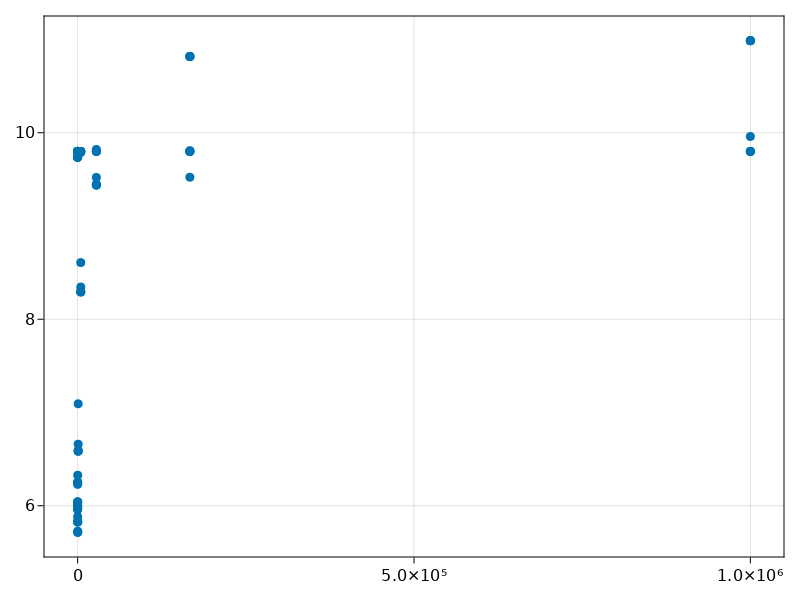

In [16]:
scatter(Float64.(m.report.plotting.parameter_values[:, 1]), m.report.plotting.measurements)

# Testing `@pipelines`

In [ ]:
using DataFrames, MLJ, VegaLite
X, y = @load_boston;
X = DataFrame(X)
y = Vector(y);

In [ ]:
rr_model = @load RidgeRegressor pkg=MLJLinearModels

In [ ]:
# pipeline with target transformation (log) and inverse transformation (exp)
rr_pipe = @pipeline(Standardizer,
                    rr_model,
                    target=UnivariateBoxCoxTransformer)
                    # ,
                    # inverse=exp)

In [ ]:
m = machine(rr_pipe, X, y)
fit!(m)

In [ ]:
fitted_params(m)

In [ ]:
r = report(m)

In [ ]:
X

In [ ]:
boxcox = UnivariateBoxCoxTransformer();
mach = fit!(machine(boxcox, y))
a, b = MLJ.transform(mach, y), y

In [ ]:
DataFrame(a=a,b=b) |>
[
    @vlplot(:bar, x=a, y="count()");
    @vlplot(:bar, x=b, y="count()")
]


# Testing a simple workflow

- Import dataset, do some clean up, fix scitypes
- Unpack predictors and response variable
- Load a ridge regressor model
- Create a pipeline with the following steps:
    - Standardize all continuous predictors
    - One hot encode all multiclass predictors
    - Transform target using log
    - Inverse target using exp

In [1]:
using CSV, DataFrames, MLJ, MLJLinearModels

In [ ]:
# Import CSV to dataframe, select some columns
lichen_training = CSV.read("C:/Users/julio/Downloads/lichen_training.csv", DataFrame; missingstring="NA") |>
dropmissing |>
x -> select(x, "Total.lichen", "basal_area", "PL", "mean_Long", "mean_Lat", "SX", "SNR") |>
x -> rename(x, ["biomass", "basalarea", "pl", "lon", "lat", "sx", "snr"]) |>
x -> coerce(x, Count => Continuous, Textual => Multiclass)

schema(lichen_training)

In [ ]:
# Unpack predictors and response variable
y, X = unpack(lichen_training, ==(:biomass), _->true);

In [ ]:
# Testing OneHotEncoder
# hot = OneHotEncoder()
# m = fit!(machine(hot, X))
# transform(m, X)

In [ ]:
model = @load RidgeRegressor pkg=MLJLinearModels
pipe = @pipeline Standardizer OneHotEncoder model target=log inverse=exp

In [ ]:
mach = machine(pipe, X, y)

In [ ]:
fit!(mach)